In [123]:
! git clone https://github.com/ageron/handson-ml2.git

fatal: destination path 'handson-ml2' already exists and is not an empty directory.


In [38]:
import sklearn
import sys

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

### 함수 정의하기

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns = "Indicator", values = "Value")
    # inequality 가 tot 인 얘들만 추출 
    # row = country, columns = indicator 그리고 matrix 값은 value 로 포멧을 변경
    
    gdp_per_capita.rename(columns = {"2015" : "GDP per capita"}, inplace =True)
    gdp_per_capita.set_index("Country", inplace = True)
    # column 이름을 2015 -> GDP per capita 로 바꿈
    # index를 country로 바꿈.
    
    full_country_states = pd.merge(left = oecd_bli, right = gdp_per_capita,
                                  left_index = True, right_index = True)
    full_country_states.sort_values(by = "GDP per capita", inplace = True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36))- set(remove_indices))
    return full_country_states[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

### 경로 찾아서, 다운받기

In [5]:
import os
datapath = os.path.join("datasets", "lifesat", "")

### 데이터 분석하기

In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

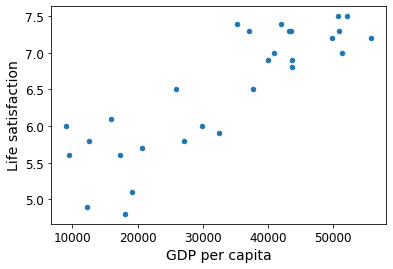

[[ 5.96242338]
 [19.58768657]]


In [7]:
data_1 = "handson-ml2//datasets//lifesat//oecd_bli_2015.csv"
oecd_bli = pd.read_csv(data_1, thousands = ',')
data_2 = "handson-ml2//datasets//lifesat//gdp_per_capita.csv"
gdp_per_capita = pd.read_csv(data_2, thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = "n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind = 'scatter', x = "GDP per capita", y = "Life satisfaction")
plt.show()
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
X_new = [[22587], [300000]]
print(model.predict(X_new))

In [49]:
import sklearn.neighbors
model_neighbors = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
model_neighbors.fit(X,y)
X_new = [[22587]]
X_new = [[22587], [300000]]
print(model_neighbors.predict(X_new))

[[5.76666667]
 [7.23333333]]


In [50]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [51]:
np.random.seed(42)

data_1 = "handson-ml2//datasets//lifesat//oecd_bli_2015.csv"
oecd_bli = pd.read_csv(data_1, thousands = ',')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(4)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3


In [52]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [53]:
data_2 = "handson-ml2//datasets//lifesat//gdp_per_capita.csv"
gdp_per_capita = pd.read_csv(data_2, thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = "n/a")

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [54]:
full_country_stats = pd.merge(left= oecd_bli, right = gdp_per_capita, 
                             left_index = True, right_index = True)
full_country_stats.sort_values(by = "GDP per capita", inplace = True)
full_country_stats.head(5)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [55]:
full_country_stats[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [78]:
remove_indices = [2, 3, 4, 5, 21, 28, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_scatterplot


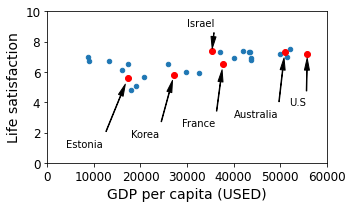

In [80]:
sample_data.plot(kind = 'scatter', x = 'GDP per capita', y = "Life satisfaction", figsize=(5,3))
plt.axis([0,60000, 0, 10])
position_text = {
    "Israel" : (30000,9),
    "Korea" : (18000, 1.7),
    "France" : (29000, 2.4),
    "Australia" : (40000, 3.0),
    "United States" : (52000, 3.8),
    "Estonia" : (4000, 1)
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S" if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext= pos_text,
                arrowprops= dict(facecolor='black', width = 0.5, shrink= 0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'ro')
plt.xlabel("GDP per capita (USED)")
save_fig('money_happy_scatterplot')
plt.show()
    
    


In [81]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [91]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Israel,35343.336,7.4
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2
Estonia,17288.083,5.6


Text(5000, 2.6, '$\\theta_1 = 5 \\times 10^{-5}$')

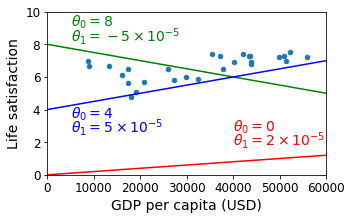

In [92]:
sample_data.plot(kind = 'scatter', x='GDP per capita', y ='Life satisfaction', figsize= (5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X= np.linspace(0,60000,1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000,2.7,r"$\theta_0 = 0$", fontsize= 14, color = 'r')
plt.text(40000,1.8,r"$\theta_1 = 2 \times 10^{-5}$", fontsize= 14, color = 'r')

plt.plot(X, 8- 5*X/100000, 'g')
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize= 14, color = 'g')
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize= 14, color = 'g')

plt.plot(X, 4 + 5*X/100000, 'b')
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize= 14, color = 'b')
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize= 14, color = 'b')

In [95]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.723983555786171, 2.6328819506745172e-05)

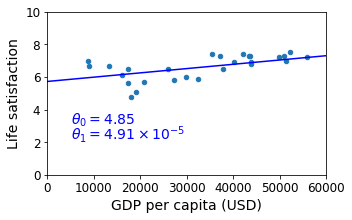

In [96]:
sample_data.plot(kind= 'scatter', x= "GDP per capita", y= "Life satisfaction", figsize= (5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

X = np.linspace(0, 60000, 1000)
plt.plot(X, t0+ t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize = 14, color = 'b')
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize =14, color= 'b')
plt.show()

In [97]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


6.3186855031065825

Saving figure cyprus_prediction_plot


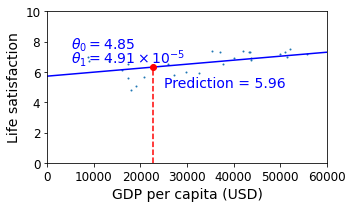

In [98]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [100]:
sample_data[3:10]

,GDP per capita,Life satisfaction
Country,,
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [101]:
(5.1+5.7+6.5)/3

5.766666666666667

In [102]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [2, 3, 4, 5, 21, 28, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

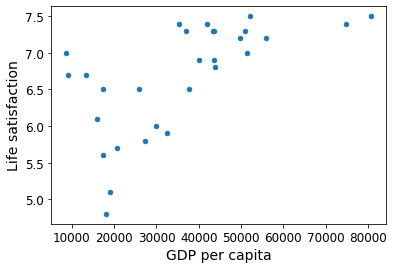

[[6.3186726 ]
 [7.04042453]]


In [104]:
data_1 = "handson-ml2//datasets//lifesat//oecd_bli_2015.csv"
oecd_bli = pd.read_csv(data_1, thousands = ',')
data_2 = "handson-ml2//datasets//lifesat//gdp_per_capita.csv"
gdp_per_capita = pd.read_csv(data_2, thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = "n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind = 'scatter', x = "GDP per capita", y = "Life satisfaction")
plt.show()
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
X_new = [[22587], [50000]]
print(model.predict(X_new))

In [105]:
oecd_bli , gdp_per_capita = backup

In [106]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Germany,40996.511,7.0
Iceland,50854.583,7.5
Luxembourg,101994.093,6.9


In [116]:
position_text2 = {
    "Russia": (1000, 9.0),
    "Turkey": (11000, 3.0),
    "Hungary": (25000, 2.0),
    "Poland": (25000, 9.0),
    "Germany": (40000, 3),
    "Iceland": (62000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure representative_training_data_scatterplot


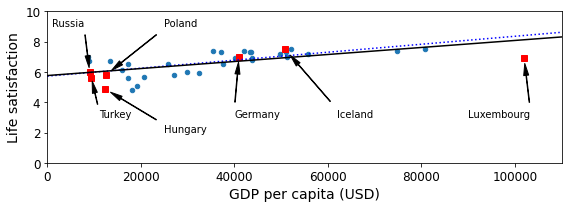

In [117]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

save_fig('representative_training_data_scatterplot')
plt.show()

Saving figure overfitting_model_plot


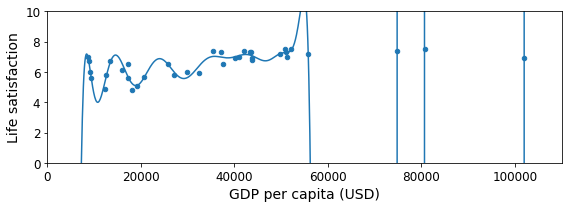

In [118]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=30, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

Saving figure overfitting_model_plot


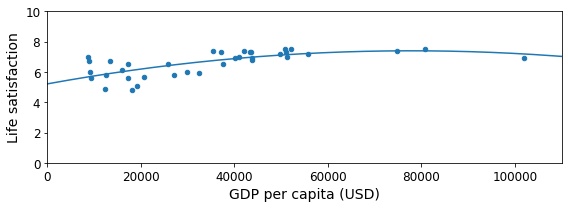

In [119]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
save_fig('overfitting_model_plot')
plt.show()

In [120]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [121]:

gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure ridge_model_plot


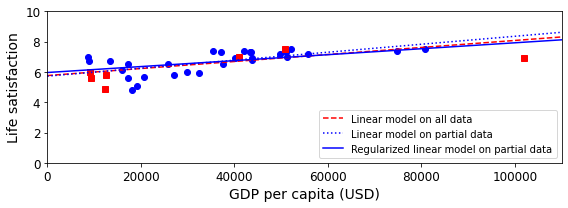

In [122]:

plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
save_fig('ridge_model_plot')
plt.show()